# Homework Set 1

## Problem 1 (20 points):

It is possible to use symbolic code to eliminate round off errors using `sympy`, see the code below. Why don't we avoid these complications this way? Modify the code below and plot the time required each loop as n ranges from 1 to 10,000 (**NB:** Use a log plot).

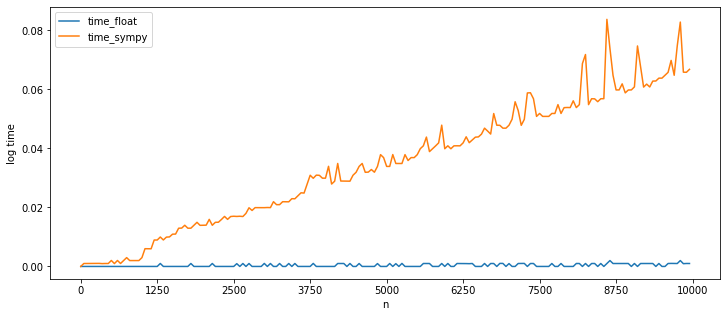

In [56]:
import sympy as sp
from sympy import Rational
dx_symbolic = Rational(1 ,10)
dx = 0.1

def loop_sympy(n):
    x = 0
    for i in range(n):
        x = x + dx_symbolic
    return x

def loop_float(n):
    x = 0
    for i in range(n):
        x = x + dx
    return x

def time_this(f, n):
    import time
    starttime = time.time()
    result = f(n)
    stoptime = time.time()
    # print(" deviation is %16.15g" % ( n * dx_symbolic - result ))
    return stoptime - starttime

# n = 10000
# print("loop using float dx:")
# time_float = time_this(loop_float, n)
# print("float loop n=%d takes %6.5f seconds" % (n, time_float))
# print("loop using sympy symbolic dx:")
# time_sympy = time_this(loop_sympy, n)
# print("sympy loop n =% d takes %6.5f seconds" % (n , time_sympy ))
# print("Symbolic loop is a factor %.1f slower." % ( time_sympy / time_float ))

fl_time = []
sympy_time = []
for num in range(1,10000,50):
    fl_time.append(time_this(loop_float, num))
    sympy_time.append(time_this(loop_sympy, num))
import numpy as np
from matplotlib import pyplot as plt
# if we use log time here, we will encounter log zero warning since the time elapsed for sympy is very close to zero
# fl_time = np.log(fl_time)
# sympy_time = np.log(sympy_time)
plt.figure(figsize=(12, 5))
l1, = plt.plot(fl_time)
l2, = plt.plot(sympy_time)
plt.legend(handles=[l1,l2],labels=['time_float','time_sympy']) 
plt.xlabel("n")
plt.ylabel("log time")
plt.xticks(range(0,201,25),[i * 50 for i in range(0,201,25)])
plt.show()

## Problem 2 (20 points):

For the first term of the conditional variance expression of the CIR process discussed in the class:

$$f(\kappa) = \frac{r_0\sigma^2}{\kappa}(e^{-\kappa t} - e^{-2\kappa t})$$

1. compute its condition number, assuming $\kappa$ is the only variable, comment on whether the computation is stable around $\kappa = 0$
2. implement a function to compute the above expression, which is numerically stable around $\kappa = 0$. A typical approach is to switch to an approximation when $\kappa$ is smaller than a threshold $h$. Explain your choice of $h$, is the $h$ different for double or single precision calculation?  

(1)

$k(f) = |\frac{\kappa}{f}\frac{\partial f}{\partial \kappa}| = |r_0\sigma^2\frac{\kappa}{f}\frac{-\kappa te^{-\kappa t}+2\kappa te^{-2\kappa t}-e^{-\kappa t}+e^{-2\kappa t}}{\kappa^2}| = |-\kappa t-1+\frac{\kappa t}{e^{\kappa t}-1}|$.

Let $\kappa$ go to 0, we have $\lim_{\kappa \to 0}k(f) = |\lim_{\kappa \to 0}\frac{t}{te^{\kappa t}}-1| = 0$. So it is well-posed near $\kappa = 0$. 

(2)

We can use derivative to estimate the expression when $\kappa$ is close to zero. We can choose $h$ such that the truncation error equals to the rounding error. For example, if we approxiate the expression with
\begin{aligned}
f(\kappa) &= r_0\sigma^2t\frac{g(-2\kappa t+\kappa t) - g(-2\kappa t)}{\kappa t} \\ 
&= r_0\sigma^2tg'(-2\kappa t) \\ &= r_0\sigma^2te^{-2\kappa t}
\end{aligned}
where $g(x) = e^x.$
We can choose $h$ such that $\frac{1}{2}g''(-2\kappa t)h^2 = g(-2\kappa t)\epsilon_m$, that is, $h^* = \sqrt{2\epsilon_m}$. 

h is different for double or single precision calculation, since under double precision, $\epsilon_m = 2^{-53}$ while under single precision $\epsilon_m = 2^{-24}$.

## Problem 3 (20 points):

Implement a matrix product function for 4 $\times$ 4 matrices using hand coded loops in python, please feel free to use numpy array and numpy vector multiplications, but obviously you should not just call numpy matrix multiplication.

Compare the speed of your implementation to the numpy matrix product version using two, randomly generated 4 $\times$ 4 matrices, plot the difference in computational time with the size of the matrix.


Hint: 

* %timeit is a useful timing tool in IPython, or you can use time.clock() function
* numpy has two ways of representing matrix, one is array of arrays, another is matrix type. For array types, the matrix product is ```a.dot(b)``` or, currently recommended, ```a@b```. For matrix type, the matrix product is ```a*b```. We recommend you to stick with array type to avoid any potential confusions. The ```a*b``` on array type is element wise multiplication. A common mistake is to use ```a*b``` for matrix product on array type. Please see the following code section as an example for these differences.
* numpy.allclose is a useful function to compare floating point calculation results

In [19]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = a + 1
print("a=\n", a)
print("\nb=\n", b)
c = a.dot(b) # matrix product
d = a@b # alternative
e = a*b #elment wise multiplication

print("\nc=a.dot(b)\n", c)
print("\nd=a@b\n", d)
print("\ne=a*b\n", e)

a=
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

b=
 [[ 2  3  4]
 [ 5  6  7]
 [ 8  9 10]]

c=a.dot(b)
 [[ 36  42  48]
 [ 81  96 111]
 [126 150 174]]

d=a@b
 [[ 36  42  48]
 [ 81  96 111]
 [126 150 174]]

e=a*b
 [[ 2  6 12]
 [20 30 42]
 [56 72 90]]


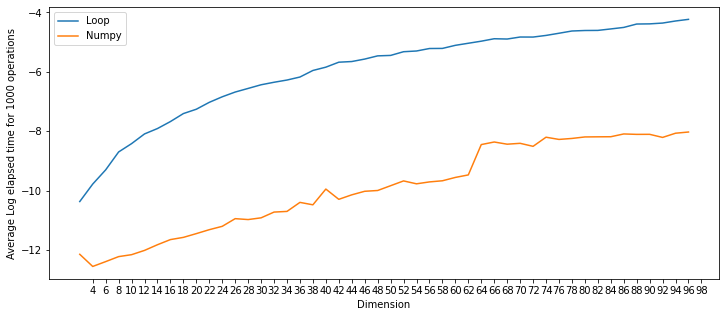

In [33]:
import time

def mat_mul(A,B): # A, B are array type, and A B are both n*n matrices
    n = len(A)
    ans = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            temp = A[i]@B[:,j]
            ans[i][j] = temp
    return ans

def compare_speed(n, k):   # n is the matrix dimension, k is number of operations
    start_time = time.perf_counter()
    for i in range(k):
        A = np.random.rand(n, n)
        B = np.random.rand(n, n)
        ans1 = mat_mul(A,B)
    end_time = time.perf_counter()
    avg_elapsed_time = (end_time - start_time) / k
    start_time = time.perf_counter()
    for i in range(k):
        A = np.random.rand(n, n)
        B = np.random.rand(n, n)
        ans1 = A @ B
    end_time = time.perf_counter()
    avg_elapsed_time2 = (end_time - start_time) / k
    return avg_elapsed_time, avg_elapsed_time2
    
time_loop = []
time_np = []
for dim in range(4,100,2):
    loop_time, np_time = compare_speed(dim, 1000)
    time_loop.append(loop_time)
    time_np.append(np_time)
    
# log time 
time_loop = np.log(time_loop)
time_np = np.log(time_np)
plt.figure(figsize=(12, 5))
l1, = plt.plot(time_loop)
l2, = plt.plot(time_np)
plt.legend(handles=[l1,l2],labels=['Loop','Numpy']) 
plt.xticks(range(1,49), range(4,100,2))
plt.xlabel("Dimension")
plt.ylabel("Average Log elapsed time for 1000 operations")
plt.show()

In [31]:
def check_correct():
    for dim in range(4,20,2):
        for i in range(100):
            A = np.random.rand(dim, dim)
            B = np.random.rand(dim, dim)
            ans1 = A @ B
            ans2 = mat_mul(A,B)
            if not np.allclose(ans1,ans2,1e-5):
                print('Something went wrong!')
    print('Correct!')

check_correct()  

Correct!


## Problem 4 (20 points):

From analysis, we know that the derivative of a differential function $f(x)$ is the limit of a difference quotient:

$$ f'(x) =  \lim_{h \rightarrow 0}\frac{f(x+h) - f(x)}{h} $$

This suggest the following approximation of the derivative by difference quotient with small but finite $h>0$:

$$ f'(x) \approx  \frac{f(x+h) - f(x)}{h} $$

for $|h|<<1$.

Analysis tells us that the approximation error should tend to zero as $h$ approaches 0. More precise information is provided by a Taylor expansion for a twice differentiable function:

$$ f(x+h) = f(x) + f'(x)h +\frac{1}{2}f''(\zeta)h^2 $$
for some
$$ \zeta = \zeta(x,h) \in |min(x,x+h),max(x,x+h)| $$

from which we infer

$$ \frac{f(x+h) - f(x)}{h} - f'(x) = \frac{1}{2} f''(\zeta)h^2$$
for some
$$ \zeta = \zeta(x,h) \in |min(x,x+h),max(x,x+h)| $$


Investigate the approximation of the derivative by difference quotients for $f(x)=e^x$, at $x=0$ for different values of $h>0$ and display both in table form and graphically the error verses $\log_{10}(h)$. **Hint:** start with $\log_{10}(h) = -1$ and run to $\log_{10}(h) = -16$.

               h  estimated derivative at 0       abs err    log err
0   1.000000e-01                   1.051709  5.170918e-02  -2.962120
1   1.000000e-02                   1.005017  5.016708e-03  -5.294981
2   1.000000e-03                   1.000500  5.001667e-04  -7.600569
3   1.000000e-04                   1.000050  5.000167e-05  -9.903454
4   1.000000e-05                   1.000005  5.000007e-06 -12.206071
5   1.000000e-06                   1.000000  4.999622e-07 -14.508733
6   1.000000e-07                   1.000000  4.943368e-08 -16.822634
7   1.000000e-08                   1.000000  6.077471e-09 -18.918677
8   1.000000e-09                   1.000000  8.274037e-08 -16.307558
9   1.000000e-10                   1.000000  8.274037e-08 -16.307558
10  1.000000e-11                   1.000000  8.274037e-08 -16.307558
11  1.000000e-12                   1.000089  8.890058e-05  -9.327992
12  1.000000e-13                   0.999201  7.992778e-04  -7.131802
13  1.000000e-14                  

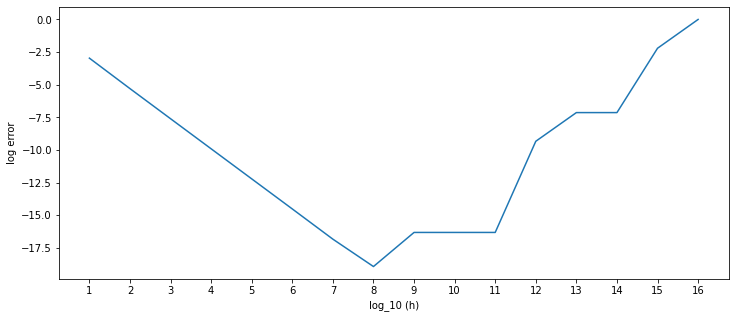

In [49]:
import pandas as pd
hs = 10. **np.arange(-1,-17,-1)
deri = [(np.exp(h)-1)/h for h in hs]
err = abs(np.array(deri) - 1)
log_err = np.log(err)
err_table = pd.DataFrame({'h':hs,'estimated derivative at 0':deri, 'abs err': err, 'log err':log_err})
print(err_table)
plt.figure(figsize=(12, 5))
plt.plot(log_err)
plt.xticks(range(16), range(1,17))
plt.xlabel("log_10 (h)")
plt.ylabel("log error")
plt.show()

## Problem 5 (20 points):

In high school (?), you learned that the quadratic equation has an analytic solution that can be written as either:
$$ x_{1,2} = \frac{-b \pm \sqrt{b^2 - 4 a c}}{2a} $$
or
$$ x'_{1,2} = \frac{-2c}{b \pm \sqrt{b^2 - 4 a c}} $$

Inspection of this second form indicates that subtractive cancellation (with a resulting increase in error) arises when $b^2 >> 4ac$ because the square root term and its preceding term nearly cancel for one of the roots.

a. Write a program that calculates all four solutions for arbitrary values of $a$, $b$, and $c$. Do not make your choices trivial!


b. Investigate how errors in you computed answers become large as the subtractive cancellation increases and relate this to your machine precision. **Hint:** A good test case uses $a=1$, $b=1$, $c=10^{-n}$, $n = 1, 2, 3, \dots$.


c. Extend your program so it indicates the most precise solutions.

C:\Users\22718\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


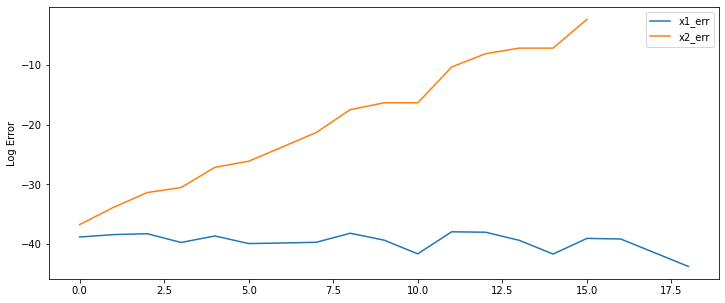

In [70]:
def simulate(a,b,c):
    sqrt_delta = np.sqrt(b*b-4*a*c)
    x1 = (-b+sqrt_delta)/2/a
    x2 = (-b-sqrt_delta)/2/a
    x_1 = -2*c/(b+sqrt_delta)
    x_2 = -2*c/(b-sqrt_delta)
    return x1,x2,x_1,x_2

c_list = [10.**i for i in range(-1,-20,-1)]
x1_list = []
x2_list = []
x_1_list = []
x_2_list = []
for c in c_list:
    x1,x2,x_1,x_2 = simulate(1,1,c)
    x1_list.append(x1)
    x2_list.append(x2)
    x_1_list.append(x_1)
    x_2_list.append(x_2)
x1_err = np.log([abs(x1_list[i]-x_1_list[i]) for i in range(len(x1_list))])
x2_err = np.log([abs(x2_list[i]-x_2_list[i]) for i in range(len(x2_list))])
plt.figure(figsize=(12, 5))
plt.plot(x1_err,label='x1_err')
plt.plot(x2_err,label='x2_err')
plt.ylabel("Log Error")
plt.legend()
plt.show()

#### Here the error in x1 does not increase dramatically since b>0, and only x2 bears cancellation in the denumerator. Therefore, error in x2 increases dramatically when b becomes close to $\sqrt{b^2-4ac}$ (which means denumerator of $x^{'}_2$ become close to 0).

In [ ]:
def precise_sol(a,b,c):
    sqrt_delta = np.sqrt(b*b-4*a*c)
    x1 = (-b+sqrt_delta)/2/a
    x2 = (-b-sqrt_delta)/2/a
    x_1 = -2*c/(b+sqrt_delta)
    x_2 = -2*c/(b-sqrt_delta)
    # avoid possible subtractive cancellation
    if b>= 0:
        return x_1, x2
    else:
        return x1, x_2